In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

In [3]:
# get the one csv form folder
def csv_from_folder(folder_path):
    files = os.listdir(folder_path)
    csv_files = [file for file in files if file.endswith('.csv')]
    return os.path.join(folder_path, csv_files[0])

### 1. The most popular animes according to users

In [12]:
data = pd.read_csv(csv_from_folder("outputs/task_1.csv"))
data.head(50)

,anime_id,title,score,popularity
0,1535,Death Note,8.67,1
1,16498,Shingeki no Kyojin,8.49,2
2,11757,Sword Art Online,7.64,3
3,5114,Fullmetal Alchemist: Brotherhood,9.25,4
4,30276,One Punch Man,8.73,5
5,22319,Tokyo Ghoul,8.00,6
6,6547,Angel Beats!,8.31,7
7,9253,Steins;Gate,9.14,8
8,1575,Code Geass: Hangyaku no Lelouch,8.79,9
9,20,Naruto,7.88,10


### 2. The most popular anime for every genre

In [6]:
data = pd.read_csv(csv_from_folder("outputs/task_2.csv"))

data['genre'] = data['genre'].apply(lambda x: str(x) if not str(x).isdigit() else None)
data.dropna(subset=['genre'], inplace=True)
data_sorted = data.sort_values(by="genre", ascending=True)
data_sorted.reset_index(drop=True, inplace=True)
data_sorted.head(50)

,genre,popularity,title
0,Action,2,Shingeki no Kyojin
1,Adventure,3,Sword Art Online
2,Cars,511,Redline
3,Comedy,4,Fullmetal Alchemist: Brotherhood
4,Dementia,48,Neon Genesis Evangelion
5,Demons,14,Ao no Exorcist
6,Drama,2,Shingeki no Kyojin
7,Ecchi,11,No Game No Life
8,Fantasy,2,Shingeki no Kyojin
9,Game,3,Sword Art Online


### 3. The most popular anime genres for every gender

In [5]:
data = pd.read_csv(csv_from_folder("outputs/task_3.csv"))
data.head(15)

,gender,genre,count
0,Female,Comedy,4671909
1,Female,Action,3482950
2,Female,Drama,3102596
3,Female,Romance,3058903
4,Female,Fantasy,2477082
5,Male,Comedy,12438080
6,Male,Action,10506368
7,Male,Romance,7422895
8,Male,Drama,6713172
9,Male,Fantasy,6232376


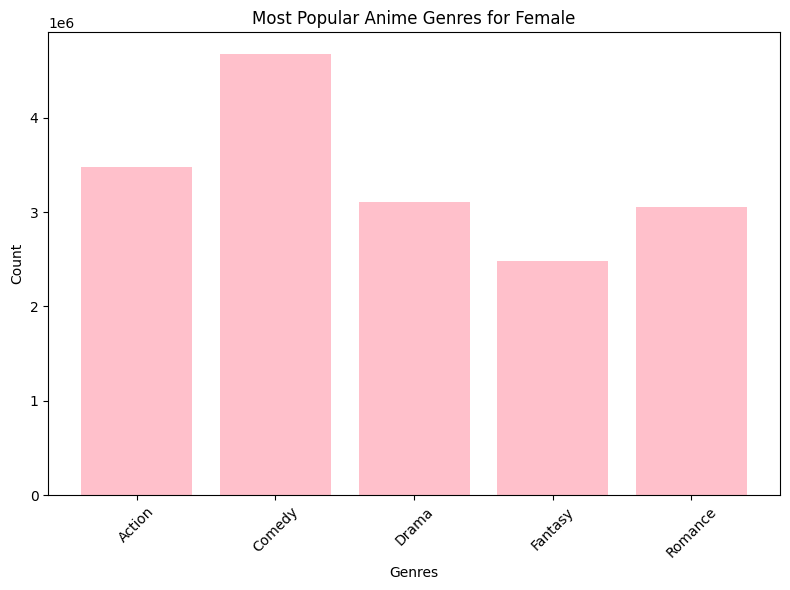

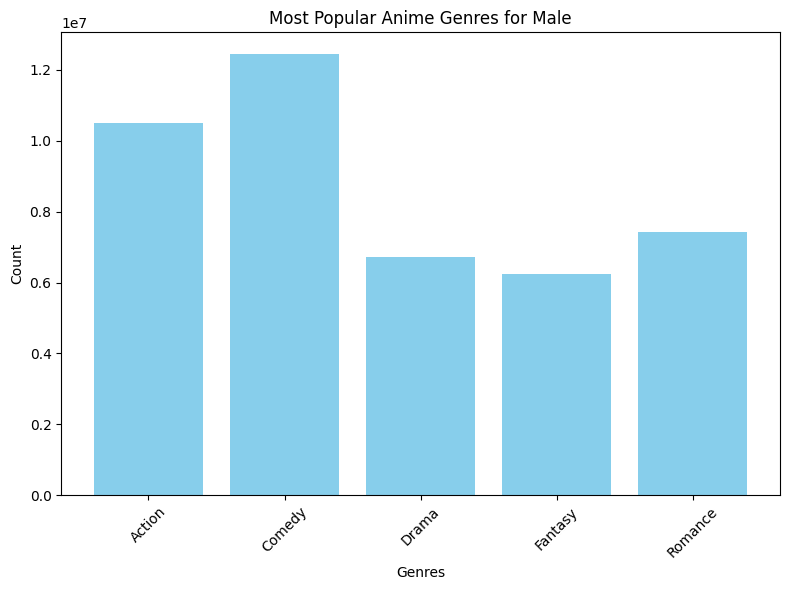

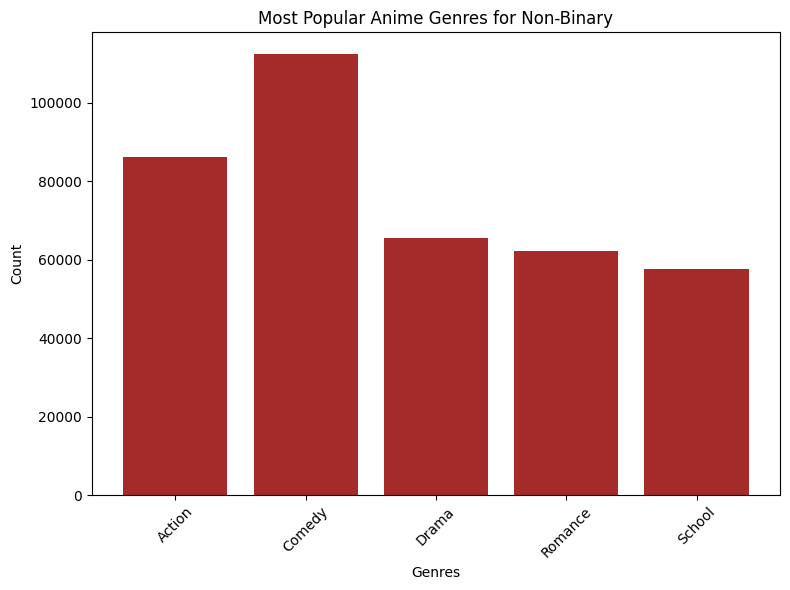

In [27]:
grouped_df = data.groupby(['gender', 'genre']).sum().reset_index()
genders = grouped_df['gender'].unique()

# colours for each gender
colors = {'Female': 'pink', 'Male': 'skyblue', 'Non-Binary': 'brown'}

for gender in genders:
    gender_data = grouped_df[grouped_df['gender'] == gender]
    plt.figure(figsize=(8, 6))
    plt.bar(gender_data['genre'], gender_data['count'], color=colors[gender])
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.title(f'Most Popular Anime Genres for {gender}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 4. Power users (users with a high number of ratings)

In [28]:
data = pd.read_csv(csv_from_folder("outputs/task_4.csv"))
data.head(50)

,user_id,username,rating_count
0,1245229,TsukasaKei,8739
1,8669,spacecowboy,8739
2,4561255,uemmega,8588
3,3979333,Exxorn,8558
4,1237755,DeadlyKizuna,8153
5,1381655,xbhrjd,8078
6,1636745,JakCooper2,7894
7,2063865,De_Baer,7412
8,291713,Dedzapadlo,7235
9,805623,DesireDestiny,7010


### 5. Anime titles with the highest number of user ratings

In [32]:
data = pd.read_csv(csv_from_folder("outputs/task_5.csv"))
data.head()

,anime_id,title,scored_by
0,1535,Death Note,1009477
1,16498,Shingeki no Kyojin,940211
2,11757,Sword Art Online,915986
3,5114,Fullmetal Alchemist: Brotherhood,733592
4,30276,One Punch Man,691845


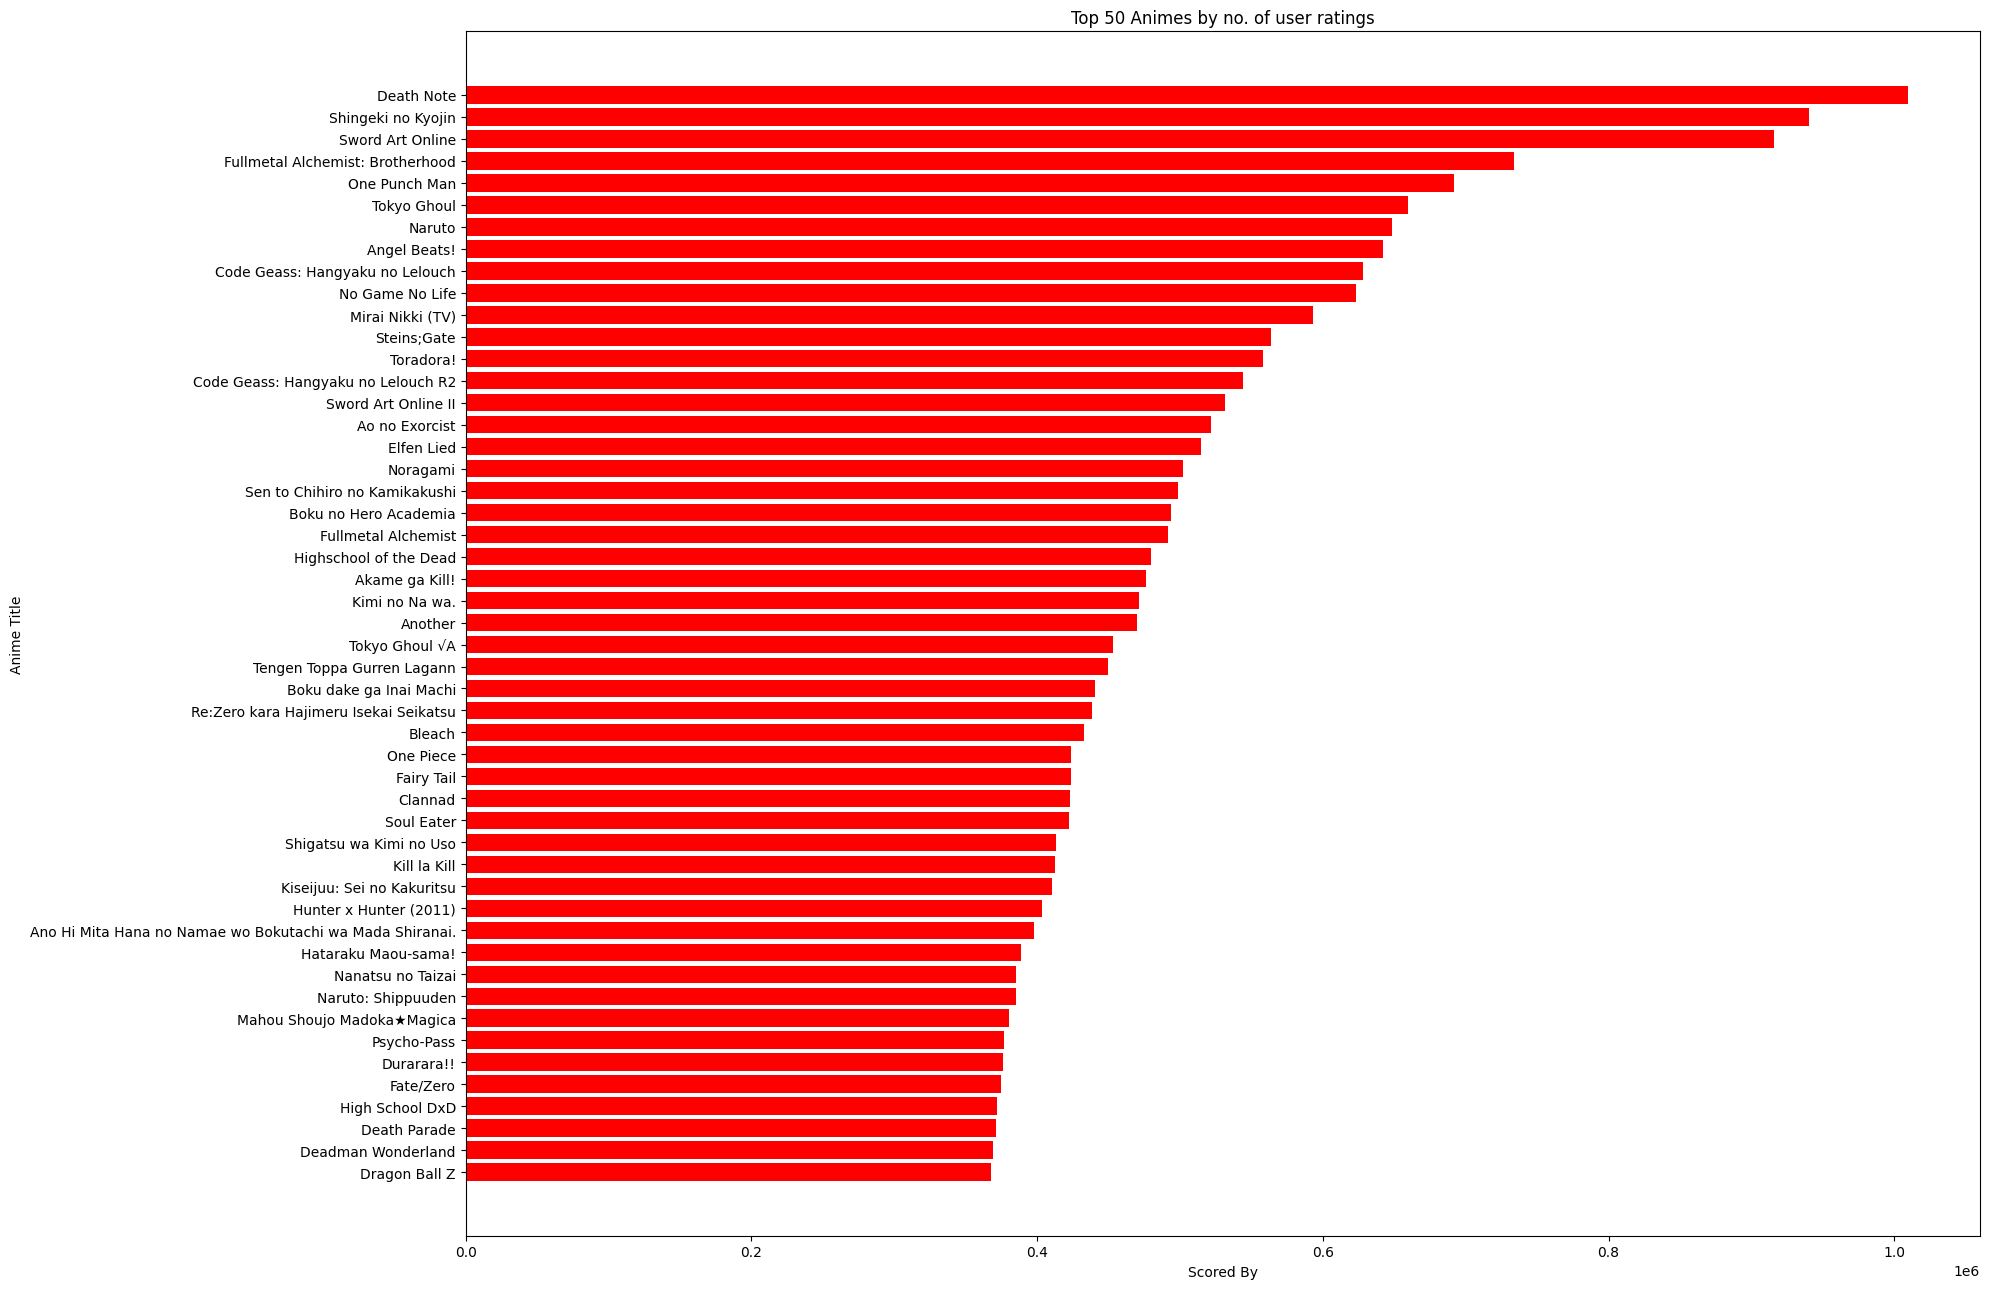

In [40]:
top_50_animes = data.sort_values(by='scored_by', ascending=False).head(50)

plt.figure(figsize=(20, 13))
plt.barh(top_50_animes['title'], top_50_animes['scored_by'], color='red')
plt.xlabel('Scored By')
plt.ylabel('Anime Title')
plt.title('Top 50 Animes by no. of user ratings')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 6. Checking for a relationship between an anime's source (e.g., manga, light novel original) and its score

In [41]:
df = pd.read_csv("data/anime_data.csv")
df = df[['source', 'score']]
df['score'] = df['score'].astype(float)
df = df.dropna(subset=['source', 'score'])

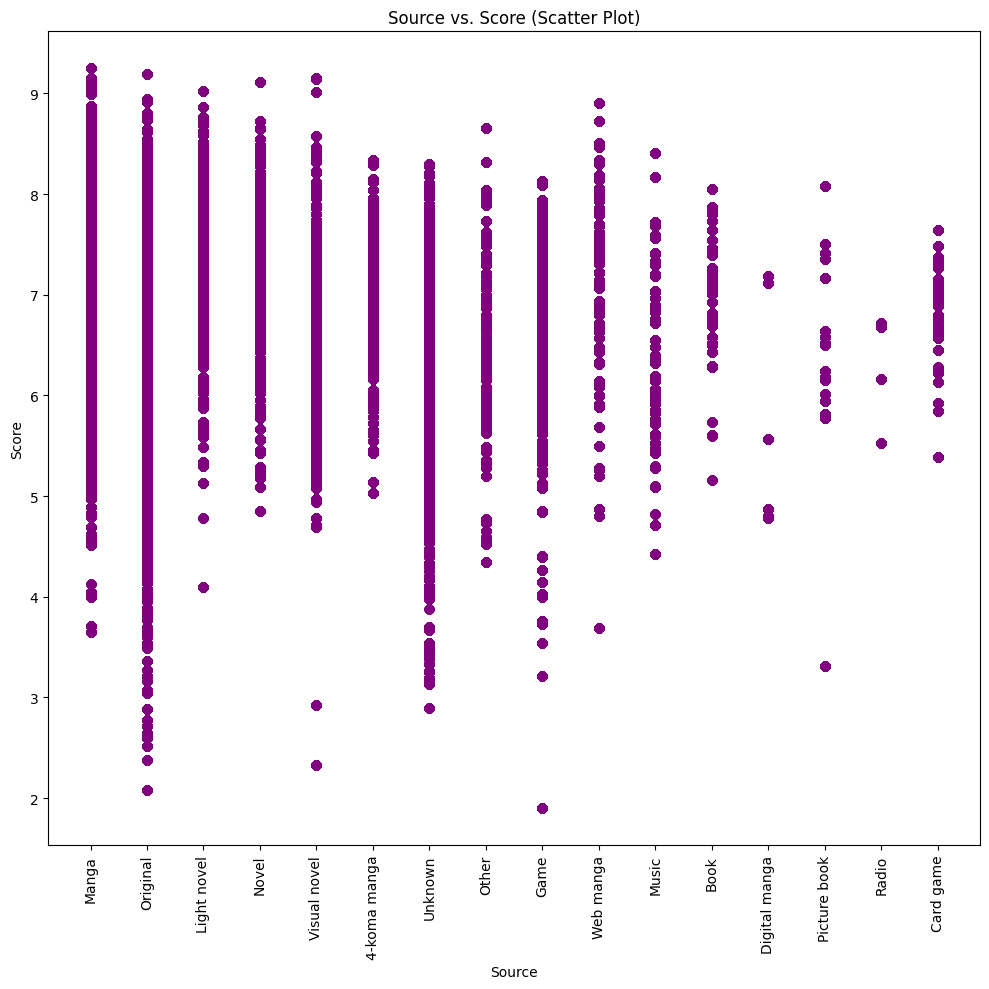

In [43]:
plt.figure(figsize=(10, 10))
plt.scatter(df['source'], df['score'], alpha=0.5, color='purple')
plt.xlabel('Source')
plt.ylabel('Score')
plt.title('Source vs. Score (Scatter Plot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()